<a href="https://colab.research.google.com/github/varydabe/Data-AI_FinalAssignmentMIC/blob/master/Week2/Week_2_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Welcome to Assignment 2 of Week 2!

<div align='center'>
  <h1>You are a Police Captain</h1>
  <img src='https://drive.google.com/uc?export=view&id=1LsHdDHL_AniRo-_uN9YfuJJIZaLD5VqG'></img>
</div>
<h4>As a police captain you want to analyze all the crime that happen to your district from 2001-2017 to improve police performance. But, once again your Data guy is taking his day off, you decided to do it yourself.</h4>
<h5>PS: You can get the original dataset here: <a href='https://www.kaggle.com/currie32/crimes-in-chicago?select=Chicago_Crimes_2001_to_2004.csv'>https://www.kaggle.com/currie32/crimes-in-chicago?select=Chicago_Crimes_2001_to_2004.csv'</a>. Because the size is big, I take only 500k rows each files.

In [173]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Task 1. Import and Combine All the Data
You have really huge data, but they separated in an year interval. Now you are going to read them ana combine them all. 

> This task will practice you to list files inside directory using glob, concatenated data, and drop dataframe column.

In [174]:
#Import pandas package to process dataframes
import pandas as pd
#import glob to finds all the pathnames matching a specified pattern, in this case all .csv files inside Chicago Crime folder
import glob

#Let's see how glob works and what it return
all_files = glob.glob('/content/drive/My Drive/Colab Notebooks/Python For Data Science Project/Week 2/Data/Chicago Crime/*csv')


In [175]:
#Let's see how glob works and what it return
all_files = glob.glob('/content/drive/My Drive/Colab Notebooks/Python For Data Science Project/Week 2/Data/Chicago Crime/*csv')
all_files

['/content/drive/My Drive/Colab Notebooks/Python For Data Science Project/Week 2/Data/Chicago Crime/Chicago_crimes_2005_to_2007.csv',
 '/content/drive/My Drive/Colab Notebooks/Python For Data Science Project/Week 2/Data/Chicago Crime/Chicago_crimes_2001_to_2004.csv',
 '/content/drive/My Drive/Colab Notebooks/Python For Data Science Project/Week 2/Data/Chicago Crime/Chicago_crimes_2008_to_2011.csv',
 '/content/drive/My Drive/Colab Notebooks/Python For Data Science Project/Week 2/Data/Chicago Crime/Chicago_crimes_2012_to_2017.csv']

You see that we use *.csv to get all file name ending with .csv and it return a list all the file in format .csv. We are gonna loop over these 3 files and read them.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>We can create pd.DataFrame() without any parameters to create empty dataframes</li>
    <li>Remember we loop inside the file lists</li>
    <li>What method to read a csv? Yes, pd.read_csv()</li>
    <li>We can concatenate our dataframe with pd.concat() and pass parameter of ignore_index.</li>
    <li>What method to print dataframe info? Yes, df.info()</li>


</ul>
</p>



In [176]:
### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
#First we creat an empty dataframe to contain our concatenated dataframes
df = pd.DataFrame()

#Loop over all files csv
for file in all_files:
  
  #Read the csv
  df_tmp = pd.read_csv(file)

  #concate the empty dataframe with our new dataframe
  df = pd.concat([df,df_tmp], ignore_index=True)

#print dataframe information to see if our data is ready
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

EXPECTED OUTPUT
```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool(2), float64(7), int64(4), object(10)
memory usage: 324.2+ MB
```

Now, lets take look at the dataset.

In [177]:
df

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1622,16.0,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,321,3.0,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,321,3.0,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,False,1633,16.0,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,822,8.0,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,2834875,9104438,HW248539,04/26/2013 10:25:00 AM,0000X W CTA 95TH ST LN,1210,DECEPTIVE PRACTICE,THEFT OF LABOR/SERVICES,CTA PLATFORM,False,False,634,6.0,21.0,49.0,11,1177779.0,1842365.0,2013,02/04/2016 06:33:39 AM,41.722768,-87.624410,"(41.722768379, -87.624410361)"
1999996,2834876,9104439,HW248562,04/26/2013 12:07:00 PM,071XX S EMERALD AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,732,7.0,6.0,68.0,18,1172582.0,1857446.0,2013,02/04/2016 06:33:39 AM,41.764268,-87.643003,"(41.764268496, -87.643003179)"
1999997,2834877,9104442,HW248328,04/26/2013 06:15:00 AM,131XX S BALTIMORE AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,RESIDENCE,True,False,433,4.0,10.0,55.0,18,1199093.0,1818497.0,2013,02/04/2016 06:33:39 AM,41.656764,-87.547139,"(41.656764077, -87.547138923)"
1999998,2834878,9104444,HW248237,04/26/2013 02:00:00 AM,005XX N RIDGEWAY AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,1122,11.0,27.0,23.0,06,1151290.0,1903388.0,2013,02/04/2016 06:33:39 AM,41.890782,-87.719842,"(41.890781894, -87.719841858)"


We still have irrelevant column: 'Unnamed: 0', we have to drop it.

In [178]:
#RUN THIS CELL AND DO NOT EDIT
#To drop a column, we can use .drop method
df = df.drop('Unnamed: 0', axis=1)
#We use axis=1 to drop column

#print 10 first dataframe
df.head(10)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1622,16.0,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,321,3.0,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,321,3.0,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,False,1633,16.0,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,822,8.0,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"
5,4673631,HM263167,03/30/2006 10:30:00 PM,014XX W 73RD PL,0560,ASSAULT,SIMPLE,APARTMENT,True,False,734,7.0,17.0,67.0,08A,1167688.0,1855998.0,2006,04/15/2016 08:55:02 AM,41.760401,-87.660982,"(41.760401372, -87.660982392)"
6,4673632,HM273234,04/05/2006 12:10:00 PM,050XX N LARAMIE AVE,0460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",True,False,1623,16.0,45.0,11.0,08B,1140791.0,1932993.0,2006,04/15/2016 08:55:02 AM,41.972221,-87.757670,"(41.972220564, -87.75766982)"
7,4673633,HM275105,04/05/2006 03:00:00 PM,067XX S ROCKWELL ST,0820,THEFT,$500 AND UNDER,STREET,False,False,832,8.0,15.0,66.0,06,1160205.0,1859776.0,2006,04/15/2016 08:55:02 AM,41.770926,-87.688304,"(41.770925978, -87.688304107)"
8,4673634,HM275063,04/05/2006 09:30:00 PM,019XX W CHICAGO AVE,0560,ASSAULT,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,False,1322,12.0,32.0,24.0,08A,1163122.0,1905349.0,2006,04/15/2016 08:55:02 AM,41.895923,-87.676334,"(41.895922672, -87.676333733)"
9,4673635,HM268513,04/03/2006 03:00:00 AM,063XX S EBERHART AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,312,3.0,20.0,42.0,08B,1180669.0,1863047.0,2006,04/15/2016 08:55:02 AM,41.779456,-87.613191,"(41.77945628, -87.613190628)"


#Task 2. What Type of Crime Happen the most? And where they usually happpen?
We won't take a look on all of them, we just need 5 most famous crimes.

> This task will practice you to count each unique value in a column occur, make a list of a Series index, filter dataframe with different method.

In [179]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1622,16.0,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,321,3.0,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,321,3.0,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,False,1633,16.0,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,822,8.0,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>Remember on how to get number of each category occur. Yes, using value_counts()</li>
</ul>
</p>



In [180]:
### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
#Count the top crime from Primary type column and get first 5 rows
top_crimes = df['Primary Type'].value_counts().head()
top_crimes

THEFT              408265
BATTERY            364186
CRIMINAL DAMAGE    232960
NARCOTICS          230750
ASSAULT            121546
Name: Primary Type, dtype: int64

Now we're gonna find where isthe most crime occur by subseting (or filter) top crime dataframe so it only contain 5 top primary type crime.

In [223]:
### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
#Get top crimes index
crime_list = top_crimes.index

#Filter the primary type 
filter_crime = df[df['Primary Type'].isin(crime_list)]

#Count location description and take 10 first rows
filter_crime['Location Description'].value_counts().head(10)

STREET                            368539
RESIDENCE                         200898
SIDEWALK                          155791
APARTMENT                         128221
OTHER                              49855
PARKING LOT/GARAGE(NON.RESID.)     42131
SCHOOL, PUBLIC, BUILDING           37728
ALLEY                              33341
RESIDENCE PORCH/HALLWAY            26440
VEHICLE NON-COMMERCIAL             25661
Name: Location Description, dtype: int64

EXPECTED OUTPUT
```
STREET                            368539
RESIDENCE                         200898
SIDEWALK                          155791
APARTMENT                         128221
OTHER                              49855
PARKING LOT/GARAGE(NON.RESID.)     42131
SCHOOL, PUBLIC, BUILDING           37728
ALLEY                              33341
RESIDENCE PORCH/HALLWAY            26440
VEHICLE NON-COMMERCIAL             25661
Name: Location Description, dtype: int64
```

Obviously, the street is where crime is most prevalent, but interestingly residence is on the second place. That show crime could happen anywhere, that's why we need to be carefull all the time and don't forget to lock the door at night.

#Task 3. Arrest Rate
Now let's see how is the performance of the police in making arrests?

In [ ]:
df.head()

TOTAL ARREST

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>You can use dataframe filtering and .shape attribute to get the size of certain value in a column.</li>
</ul>
</p>



In [ ]:
### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
#Lets count how many arrest the police made so far?

#Count the number of True inside Arrest column as a series
arrest = df[df.Arrest == True].shape[0]

#Print the arrest number
print('Police has made {:,.0f} arrests in 16 years'.format(arrest))

EXPECTED OUTPUT
```
Police has made 573,381 of arrest in 16 years
```

ARREST RATE<br>
to count arrest rate you need to divide the number of arrest with total cases.

In [ ]:
### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
#We already can access the number of arrest, and now we only have to compute the arrest rate
AR = arrest/df.shape[0]*100

print('CPD arrest rate of reported crimes is {:.2f}%'.format(AR))

EXPECTED OUTPUT
```
CPD arrest rate of reported crimes is 28.67%
```

ARREST RATE FOR LESS SERIOUS OFFENSE AND SERIOUS OFFENSE<br>
To get the category, I already made a .csv file containing FBI code and the category.

In [ ]:
#RUN THIS CODE TO IMPORT THE FILE
category = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Python For Data Science Project/Week 2/Data/FBI_Code.csv')
category

Now we will join both dataframe based od the FBI code. But first, let's take a look at FBI code in our df values.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>You know there are 2 ways to combine two dataframes by it's column.</li>
    <li>if you use join() method, dont forget that key column on right table need to be the index.</li>
    <li>if you use merge() method, make sure that both key columns are the same</li>
</ul>
</p>



In [ ]:
### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
#Pass outer in 'how' parameter so your df stay in it's original shape
df = df = df.join(category.set_index('FBI Code'), on='FBI Code')
df.head(10)

Less Serious Offenses

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>Recall on how you subset a dataframe with a condition. You can use df[pd.Series Condition]</li>
    <li>To get number of cases you only need to get the shape of LSO dataframe.</li>
    <li>Arrest Rate = Number of Arrest/Number of cases*100%</li>
</ul>
</p>



In [ ]:
### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
#Number of Less Serious Offense
#Subset the dataframe so it only has Less Serious Offenses category
LSO = df[df['Offense Category']=='LESS SERIOUS OFFENSES']

#Number of cases
LSO_number = LSO.shape[0]

#Compute the arrest rate
LSO_AR = df[(df['Offense Category']=='LESS SERIOUS OFFENSES') & (df.Arrest == True)].shape[0]/LSO_number*100

#Print the number of cases and the arrest rate
print('There were {:,.0f} less serious offense happened from 2001-2017 with arrest rate of {:.2f}%'.format(LSO_number,LSO_AR))

EXPECTED OUTPUT
```
There were 1,207,115 less serious offense happened from 2001-2017 with arrest rate of 39.34%
```


Serious Offenses

In [ ]:
### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
#Number of Serious Offense
#Subset the dataframe so it only has Serious Offenses category
SO = df[df['Offense Category']=='SERIOUS OFFENSES']

#Number of cases
SO_number = SO.shape[0]

#Compute the arrest rate
SO_AR = df[(df['Offense Category']=='SERIOUS OFFENSES') & (df.Arrest == True)].shape[0]/SO_number*100

#Print the number of cases and the arrest rate
print('There were {:,.0f} serious offense happened from 2001-2017 with arrest rate of {:.2f}%'.format(SO_number, SO_AR))

EXPECTED OUTPUT
```
There were 792,885 serious offense happened from 2001-2017 with arrest rate of 12.42%
```

#Task 4. What Times Do Most Crime Occur?
As your captain, it's important to utilize man resource in correct time to patrol. So, you wonder, when is the time moset crime occur?

> This task will practice you to change column type to datetime, extract hour attribute of datetime column, and find values frequency in a column.

In [193]:
#Since I haven't introduce to change column type to datetime so, i'll guide you this time.
#To change column to datetime, we can use pd.to_datetime(), you can see the format for your datetime here: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
df['Date'] = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 22 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              object        
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int64         
 18  Updated On            object        
 19  

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>to get hour from datetime column, you can use pd.Series.dt.hour</li>
    <li>Remember we want to compute size of each value in hour appear. So, we could use value_counts().</li>
    <li>value.counts() return us a pd.Series with sorted value descendingly, but we want the series sorted within the index (from 0 hours to 23 hours)</li>
</ul>
</p>



In [194]:
### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###

#Get the hour from Date column
df['hours'] = df.Date.dt.hour

#Compute crime time and sort the index.
most_time = df.hours.value_counts().sort_index()

most_time

0     112548
1      64259
2      53857
3      43091
4      31946
5      26281
6      30493
7      45189
8      67321
9      85406
10     83913
11     87838
12    111880
13     94451
14    100072
15    105856
16    100075
17    101165
18    109242
19    113937
20    114639
21    113396
22    111832
23     91313
Name: hours, dtype: int64

EXPECTED OUTPUT
```
0     112548
1      64259
2      53857
3      43091
4      31946
5      26281
6      30493
7      45189
8      67321
9      85406
10     83913
11     87838
12    111880
13     94451
14    100072
15    105856
16    100075
17    101165
18    109242
19    113937
20    114639
21    113396
22    111832
23     91313
Name: hours, dtype: int64
```
Kinda hard to see what time is it right? Now I'm gonna visualize it with seaborn.

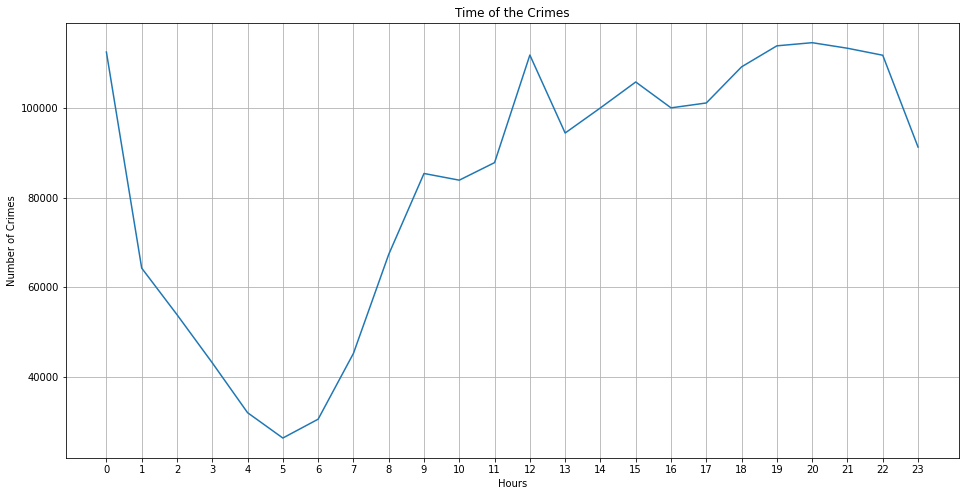

In [195]:
#RUN THE CELL AND DO NOT EDIT IT
import seaborn as sns
import matplotlib.pyplot as plt

ax,fig = plt.subplots(figsize=(16,8))

ax = sns.lineplot(x = most_time.index, y = most_time.values).set(xlabel='Hours', ylabel='Number of Crimes',title='Time of the Crimes')
ax = plt.xticks([i for i in range(0,24)],[i for i in range(0,24)])
plt.grid(True)

Now you could see that crimes increasing from 9.00 AM to 00.00 AM but the peak is at night around 18.00 - 22.00. However, crimes sharply decreased near dawn. With this information you can deploy your man in the right time. 

#Task 5. Mapping Crime Pattern Accross the Day
Now we're gonna make a geospatial map that visualize crime pattern every hour. For now' I will make the visualization, and you can help me prepare the data.

First, to make choropleth map, we need to import geospatial boundary for Chicago districts in form of geojson. I already download and save the file inside Data/ folder. The Json looks like something like this:
```
{
  "type": "FeatureCollection",
  "features": [
    {"type":"Feature","properties":{"dist_label":"17TH","dist_num":"17"},
```
You can see that dist_num inside the json files is in string type. So we gotta change our District column to string type. But, take a look at the column first.

In [206]:
df.District.head(5)

0    16
1     3
2     3
3    16
4     8
Name: District, dtype: object

District column is float type, if we convert it directly to string, it will become something like '16.0' while we want to remove '.0' or decimal part. So what we are going to do now is to change it to integer first, then to string. However, District column contain NaN values, if we directly change the type by astype, it will rise error, so we're gonna access the column one by one.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>to convert data to int we can use int(), and to convert data to string we can use str() method.</li>
    <li>Remember if we want to apply a function row wise in a column, we can use .apply() method with lambda function inside.</li>
</ul>
</p>



In [221]:
### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
#Create tostr() function with error handling
def tostr(x):
  try:
    #Convert x to integer
    i = int(x)

    #Convert i to string
    i = str(i)
  except ValueError:
    i = x

  return i 

#Iterate over district column row-wise
df['District'] = df.District.apply(lambda x: tostr(x))
df['District'].head()

0    16
1     3
2     3
3    16
4     8
Name: District, dtype: object

EXPECTED OUTPUT
```
0    16
1     3
2     3
3    16
4     8
Name: District, dtype: object
```

Now, to create the map, I need a list of dataframe that have been filtered by the hour from 0-23 and contain only number of crime each district. To increase our skill, we will do this only with one line of code.
1. First you need to filter your dataframe by the hour as an index that loop over 0-23 later.
2. Second, you will compute Distric column values frequency.
3. Step 2 yield a pandas series, and we need to change it to dataframe, because I'll need to access the column name on visualization.
4. Rename 'index' column to 'District', and 'District' columns to 'Crimes'
5. Define the loop to subtitute the hour value in step 1.


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>For step 1, remember you can filter the data by subsetting it with df[df.COLUMN_NAME CONDITION]</li>
    <li>To compute frequency, we can use value_counts() to district column</li>
    <li>To make pd.Series back to Dataframe and reset the index, we can use reset_index() method.</li>
    <li>To rename columns we can use .rename(column={}) method</li>
    <li>Because we need the hour to be a value from 0 to 23, we can use in range() method.</li>
</ul>
</p>



In [214]:
### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
#All the step is on the desription above
#hours_list = [None.None.None for i in None]

hours_list = [df['District'].value_counts().reset_index().rename(columns={'index':'District', 'District':'Crimes'}) for i in range(0,24)]
len(hours_list)

24

EXPECTED OUTPUT
```
24
```

Cool, thanks for helping. Now the data is ready. All you have to do is run the cell above. Unfortunately, the map can't be shown directly in output terminal. But in the line we save the map in html format that you can see in your current directory. Just download it and open with your favorite browser.

In [219]:
### RUN THIS CELL AND DO NOT EDIT ###
import folium
from branca.colormap import linear

map = folium.Map(location=[41.8477468, -87.7567485], tiles='cartodbpositron')

fs = [folium.FeatureGroup(name='{}'.format(i),overlay=False).add_to(map) for i in range(0,24)]

geojson = "/content/drive/My Drive/Colab Notebooks/Python For Data Science Project/Week 2/Data/Chicago Crime/District.geojson"
for i in range(len(hours_list)): 
    choropleth1 = folium.Choropleth(
    geo_data= geojson,
    name='choropleth',
    data=hours_list[i],
    columns=['District', 'Crimes'],
    key_on='feature.properties.dist_num',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Crimes',
    highlight=True,
    line_color='black').geojson.add_to(fs[i])


    #geojson for labels
    geojson1 = folium.GeoJson(data="/content/drive/My Drive/Colab Notebooks/Python For Data Science Project/Week 2/Data/Chicago Crime/District.geojson",
               name='Chicago Police Districts',
                         smooth_factor=2,
               style_function=lambda x: {'color':'black','fillColor':'transparent','weight':0.5},
                tooltip=folium.GeoJsonTooltip(fields=['dist_num'],
                                              labels=False,
                                              sticky=True),
              highlight_function=lambda x: {'weight':3,'fillColor':'grey'},
                        
                       ).add_to(choropleth1)

crime_min, crime_max = 10e6, 0
for i in hours_list:
  crime_min = i.Crimes.min() if i.Crimes.min()<crime_min else crime_min
  crime_max = i.Crimes.max() if i.Crimes.max()>crime_max else crime_max
  print(crime_min,crime_max)

colormap = linear.BuPu_09.scale(
crime_min,
crime_max).to_step(10)
colormap.caption = 'Crimes'
colormap.add_to(map)

folium.TileLayer('cartodbdark_matter',overlay=True,name="dark mode").add_to(map)
folium.TileLayer('cartodbpositron',overlay=True,name="light mode").add_to(map)

folium.LayerControl(collapsed=False).add_to(map)

map.save('crimes_hour.html')

1 137726
1 137726
1 137726
1 137726
1 137726
1 137726
1 137726
1 137726
1 137726
1 137726
1 137726
1 137726
1 137726
1 137726
1 137726
1 137726
1 137726
1 137726
1 137726
1 137726
1 137726
1 137726
1 137726
1 137726


You will see map like this:
![](https://drive.google.com/uc?export=view&id=1pq6TvVj9SSxLpIxRG61xdb-ouWDKVU7V)

Good job! Now you can optimize your troops deployment to correct time and places. 